# Advanced Machine Learning and Artificial Intelligence (MScA 32017)

# Speech Recognition

## Notebook 2: Generating Waveforms of Sounds

## Yuri Balasanov, &copy; iLykei 2018

##### Main text: Artificial Intelligence with Python. A Comprehensive Guide to Building Intelligent Apps for Python Beginners and Developers, Prateek Joshi, &copy; Packt Publishing  2017

This notebook explains generation of sound waveforms.

Python code in this notebook is based on [the complimentary code for the book](https://github.com/PacktPublishing/Artificial-Intelligence-with-Python/tree/master/Chapter%2012/code) with modifications.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating audio signals

Use NumPy to generate audio signals as mix of sine waves with predefined parameters.

Create a file name for the generated signal. Specify parameters of the signal:
- Duration in seconds
- Sampling frequency in Hz
- Tone frequency, i.e. the frequency of the sine wave
- Minimum and maximum values, i.e. amplitude.

In [2]:
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

# audio parameters
duration = 4  # in seconds
sampling_freq = 44100  # in Hz
tone_freq = 146  # in Hz
min_val = -4 * np.pi
max_val = 4 * np.pi

Generate signal, scale it to 16-bit integer values and write it to the file.

In [5]:
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Scale to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save 
write(output_file, sampling_freq, signal_scaled)

Find the new file and play it. How do you like the generated sound?

Add some white noise to the signal and listen again.

In [6]:
# Adding noise
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

Can you hear difference? Does noise make it better? Change signal frequecy and see what difference it makes.

Plot the first 200 observations of the audio signal.

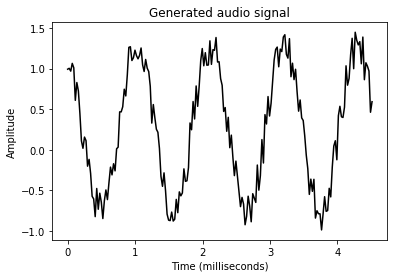

In [7]:
signal = signal[:200]

# time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# plot
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

# Synthesizing tones to generate music

The signal generated in the previous section had a single tone (monotone signal). The result was not very pleasant for ear.

We like music because it mixes tones together.

Find frequencies of standard musical tones [here](http://pages.mtu.edu/~suits/notefreqs.html).

In [8]:
import json

Define function generating a tone with given frequency, duration, amplitude and sampling frequency:

In [9]:
def tone_synthesizer(freq, duration, amplitude=1.0, sampling_freq=44100):
    # time axis 
    time_axis = np.linspace(0, duration, int(duration * sampling_freq))
    # audio signal
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)

    return signal.astype(np.int16) 

Check how the function works:
- Generate 2 signals with single tone - 'D' and 'G' in octave 4 - lasting 3 seconds with amplitude 12000 and sampling frequency 44100 Hz; save them in 2 separate files
- Combine them together to make a chord, save the chord in another file.

Table of frequencies corresponding to each tone is in file `tone_mapping_new.json` which was created using the link above. 

In [11]:
# Set parameters
tone_name_1 = 'D4'
tone_name_2 = 'G4'
duration = 3     # seconds
amplitude = 12000
sampling_freq = 44100    # Hz
mapping_file = 'tone_mapping_new.json'

# Load mapping file
with open(mapping_file, 'r') as f:
    tone_map = json.loads(f.read())
    
# Extract the tone frequency
tone_freq1 = tone_map[tone_name_1]
tone_freq2 = tone_map[tone_name_2]
print('Frequency D: ',tone_freq1,'Frequency G: ',tone_freq2)

# Generate single tones 
synthesized_tone_D = tone_synthesizer(tone_freq1, duration, amplitude, sampling_freq)
synthesized_tone_G = tone_synthesizer(tone_freq2, duration, amplitude, sampling_freq)

# Generate chord
synthesized_chord = synthesized_tone_D + synthesized_tone_G
synthesized_chord = np.int16(synthesized_chord/np.max(np.abs(synthesized_chord)) * scaling_factor)

# Write the audio signals to files
write('file_tone_single_d.wav', sampling_freq, synthesized_tone_D)
write('file_tone_single_g.wav', sampling_freq, synthesized_tone_G)
write('file_chord_d_g.wav', sampling_freq, synthesized_chord)

Frequency D:  293.66 Frequency G:  392


Check how individual tones and the chord sound.

Plot separate tones.

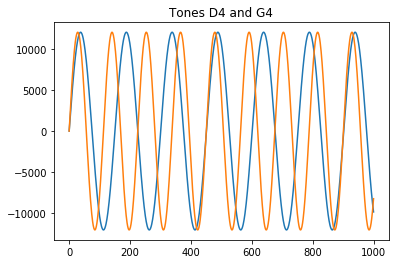

In [9]:
plt.plot(synthesized_tone_D[:1000])
plt.plot(synthesized_tone_G[:1000])
plt.title('Tones D4 and G4')
plt.show()

Plot the chord waveform

<function matplotlib.pyplot.show(*args, **kw)>

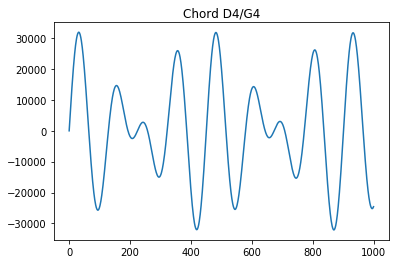

In [10]:
plt.plot(synthesized_chord[:1000])
plt.title('Chord D4/G4')
plt.show

<font color=blue>
    
**Assignment** <br>

Practice coding wav files with music.

Below is the first 4 bars from an iconic song of the classical hard rock group which has a reason to be mentioned in this course because it is **Deep** Purple. This is also one of the most recognizable guitar riffs of all times. 


![Model plot](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FSpeech%20Recognition%2FDeepP.JPG)

<font color=blue>
Write a code that creates a wav file that plays this music.
    
1. Use file `tone_mapping_new.json` to extract frequencies of main tones
2. Create a list of tuples, one for each chord, containing first tone, second tone of the chord, chord duration in seconds and chord amplitude. Make each quarter note last half second. This list of tuples is the code of the music. Note that there are 2 rests in the music. How would you represent these rests in your list of tuples?
3. Select sampling frequency corresponding to CD quality (44100 Hz). Select regular amplitude of 12000
4. Initialize waveform signal as an empty NumPy array `np.array([])`
5. Loop through all chords of the music with following steps:
    - Extract frequencies of each tone, duration and amplitude
    - Synthesize each chord waveform
    - Combine the tones in a chord
    - Append the normalized chord to the signal
6. Normalize the signal    
7. Write the signal to a wav file and play it back

In [11]:
# Skipped code.
# Define the tone sequence along with corresponding durations in seconds and amplitudes
# Step 2


In [12]:
# Skipped code.
# Follow steps 3-7


# File name for the music sequence

# File name for the tone map. Source: http://www.phy.mtu.edu/~suits/notefreqs.html

# Load mapping file

#print(tone_map)


# Initiate signal

# Loop through chords
    
    # Extract the corresponding frequency of the tone
    
    # Extract the duration
        
    # Extract the amplitude

    # Synthesize the tones
        
    # Combine the tones


    # Append the output signal
    
# Normalize the signal

# Save the audio in the output file


Save the created tone sequence to a file `test_submission.csv` using the function below and upload the file to the test application.

In [13]:
import sys
def save_tone_sequence(file_name, tone_sequence):
    f = open(file_name,'w',errors='ignore')   
    for rec in tone_sequence:       
        st = rec[0] + ',' + rec[1] + ',' + str(rec[2]) + ',' + str(rec[3]) + '\n'                   
        f.write(st)
        pass   
    f.close()

`save_tone_sequence("test_submission.csv", tone_sequence)`

In [14]:
from IPython.display import IFrame
def show(url,width=400,height=400):
    return IFrame(url, width, height)
show("https://shiny.ilykei.com/courses/AdvancedML/Sound_Generation_Class",
    width=500,height=300)